Step:
 - Trials split
   - Detect target trials from non target trials
 - Detect the target character
   - Detect the target row and column

**Import the require library**

pip install os<br/>
pip install mne<br/>
pip install numpy<br/>
pip install scipy<br/>
pip install matplotlib<br/>

In [1]:
import numpy as np
from scipy import io
from importlib import reload
import matplotlib.pyplot as plt
from Functions import Data_path, Plot_data

**Step 1.1: Importing pathway files**

In [2]:
# Define the base folder path where the data is located
folder_path = "D:\P300-based-EEG-signal-processing\Data" 
path_files, files, folders = Data_path.data_path(folder_path, data_format="mat") 
path_files

['D:\\P300-based-EEG-signal-processing\\Data\\AAS010R01.mat',
 'D:\\P300-based-EEG-signal-processing\\Data\\AAS010R02.mat',
 'D:\\P300-based-EEG-signal-processing\\Data\\AAS010R03.mat',
 'D:\\P300-based-EEG-signal-processing\\Data\\AAS010R04.mat',
 'D:\\P300-based-EEG-signal-processing\\Data\\AAS010R05.mat',
 'D:\\P300-based-EEG-signal-processing\\Data\\AAS011R01.mat',
 'D:\\P300-based-EEG-signal-processing\\Data\\AAS011R02.mat',
 'D:\\P300-based-EEG-signal-processing\\Data\\AAS011R03.mat',
 'D:\\P300-based-EEG-signal-processing\\Data\\AAS011R04.mat',
 'D:\\P300-based-EEG-signal-processing\\Data\\AAS011R05.mat',
 'D:\\P300-based-EEG-signal-processing\\Data\\AAS011R06.mat',
 'D:\\P300-based-EEG-signal-processing\\Data\\AAS012R01.mat',
 'D:\\P300-based-EEG-signal-processing\\Data\\AAS012R02.mat',
 'D:\\P300-based-EEG-signal-processing\\Data\\AAS012R03.mat',
 'D:\\P300-based-EEG-signal-processing\\Data\\AAS012R04.mat',
 'D:\\P300-based-EEG-signal-processing\\Data\\AAS012R05.mat',
 'D:\\P3

**Step 1.2: Load data and other information**<br/>
- `Flashing:` 1 when row/column was intensified (shown), 0 otherwise.
- `PhaseInSequence: `1 (i.e., blank , before row/column intensifications started), 2 while row/columns are intensified (shown), 3 (i.e., blank, after row/column intensifications start).
- `StimulusCode:` 0 (i.e., matrix is blank), 1…6 for intensified (shown) columns, 7…12 for intensified (shown) rows.
- `StimulusType:` 0 when no row/column is being intensified (shown) or row/column does not contain desired character, 1 when intensified row/character does contain the desired character. 

In [3]:
data = io.loadmat(path_files[0])          # Load the MATLAB file

fs = 240                                  # Define the sampling frequency
signal = data["signal"]                   # Extract EEG data (number of samples, number of channels)
trialnr = data["trialnr"]                 # Extract trial numbers
flashing = data["Flashing"]               # Extract flashing information
stimulus_type = data["StimulusType"]      # Extract stimulus types
stimulus_code = data["StimulusCode"]      # Extract stimulus codes
phase_sequence = data["PhaseInSequence"]  # Extract phase sequence

In [4]:
print(f" Signal.shape: {signal.shape}, \n Trialnr.shape: {trialnr.shape}, \n Flashing.shape: {flashing.shape}, \
\n Stimulus_type.shape: {stimulus_type.shape}, \n Stimulus_code.shape: {stimulus_code.shape}, \n Phase_sequence.\
shape: {phase_sequence.shape}")

 Signal.shape: (26328, 64), 
 Trialnr.shape: (26328, 1), 
 Flashing.shape: (26328, 1), 
 Stimulus_type.shape: (26328, 1), 
 Stimulus_code.shape: (26328, 1), 
 Phase_sequence.shape: (26328, 1)


**Step 1.2: Plot data (** *Plot a run* **)**<br/>

*Input parameters:*
 - `data:` EEG data (number of samples, number of channels)
 - `fs:` Sampling frequency of the EEG data
 - `channels:` Names of the EEG channels
 - `first_point:` Index of the first data point to plot (optional, defaults to 0)
 - `last_point: `Index of the last data point to plot (optional, defaults to 3000)
 - `val_ylim:` Madatamum absolute y-adatas limit for the plot (optional, defaults to 2.7)
 - `size_fig:` Size of the figure (optional, defaults to (5, 5))
 - `title:` Title of the plot (optional, defaults to 'Raw data')
 - `display_figure:` Whether to display the figure ('on' or 'off') (optional, defaults to 'on')

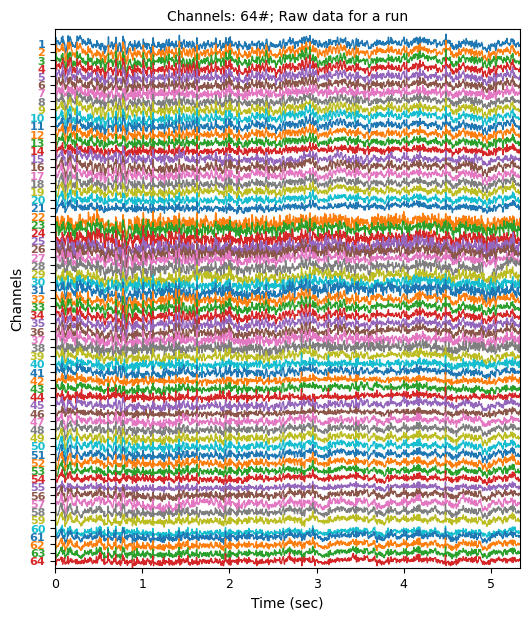

In [5]:
title = f"Raw data for a run" # Define plot title

# Plot EEG data using the Plot_data.plot_data function
Plot_data.plot_data(signal, fs, channels_name=None, first_point=0, last_point=1280, val_ylim=2.7, title=title,
                    size_fig=(6, 7), display_figure="on")  

**Step 1.3: Plot trialnr, flashing, StimulusCode and PhaseInSequence (** *Plot a run* **)**<br/>

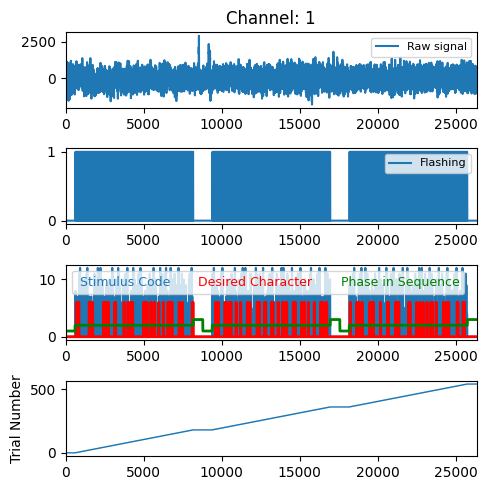

In [6]:
ind = np.where(trialnr <= np.max(trialnr))[0]

plt.figure(figsize=(5, 5))  # Adjust width and height as needed
plt.subplot(4, 1, 1)         # Plot original signal for one channel 
plt.plot(signal[:, 0])
plt.title('Channel: 1')
plt.legend(['Raw signal'], fontsize=8)
plt.autoscale(enable=True, axis="x", tight=True)

plt.subplot(4, 1, 2)        # Plot Flashing
plt.plot(flashing)
plt.legend(['Flashing'], fontsize=8)
plt.autoscale(enable=True, axis="x", tight=True)

plt.subplot(4, 1, 3)        # Plot StimulusCode and PhaseInSequence
plt.plot(stimulus_code, label="Stimulus Code")
plt.plot(np.max(stimulus_code) / 2 * stimulus_type[ind], 'r', linewidth=2, label="Desired Character")
plt.plot(phase_sequence, 'g', linewidth=2, label="Phase in Sequence")
plt.autoscale(enable=True, axis="x", tight=True)
plt.legend(fontsize=9, loc="best", ncol=3, handlelength=0, handletextpad=0.25, frameon=True, labelcolor=\
           'linecolor')

plt.subplot(4, 1, 4)        # Plot trialnr
plt.plot(trialnr, linewidth=1)
plt.ylabel('Trial Number', fontsize=10)
plt.tight_layout()
plt.autoscale(enable=True, axis="x", tight=True)

**Step 2.1: Split trials for all datasets or runs**

In [7]:
fs = 240  # Define sampling frequency
time_trial = 600  # Define the duration of each trial in milliseconds (e.g., 600 is ms)
data_target, data_non_target = [], [] # Initialize a list to store data lists 
duration_trial = round(time_trial / 1000 * fs)

for filename in path_files[:11]:
    data = io.loadmat(filename)          # Load the MATLAB file
    signal = data["signal"]                   # Extract EEG data (number of samples, number of channels)
    trialnr = data["trialnr"]                 # Extract trial numbers
    stimulus_type = data["StimulusType"]      # Extract stimulus types
    
    for i in range(1, np.max(trialnr) + 1):
        ind = np.where(trialnr == i)[0] # Get the start time of each trial
        data_trial = signal[ind[0]:ind[0] + duration_trial, :] # Start point of ith trial until ith trial
        
        # Detect target trials from non-target trials
        if np.max(stimulus_type[ind]) == 1:  # type of ith trial
            data_target.append(data_trial[:, :, np.newaxis])
        elif np.max(stimulus_type[ind]) == 0:  # type of ith trial
            data_non_target.append(data_trial[:, :, np.newaxis])

data_target = np.concatenate(data_target, axis=2)
data_non_target = np.concatenate(data_non_target, axis=2)

print(f" Data_target.shape: {data_target.shape}, \n Data_non_target.shape: {data_non_target.shape}")

 Data_target.shape: (144, 64, 1261), 
 Data_non_target.shape: (144, 64, 6300)


**Step 2.2: Plot a channel for one of the trials and all trials**

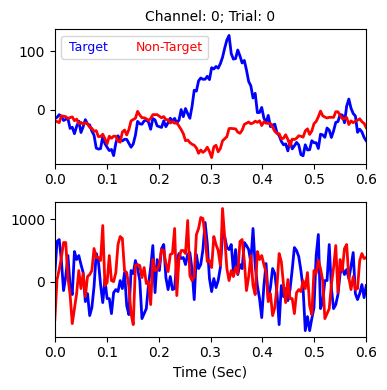

In [11]:
trial = 0
channel = 0
target_a_trial = data_target[:, channel, trial]
non_target_a_trial = data_non_target[:, channel, trial]
target_mean = np.mean(data_target[:, channel, :], axis=1)
non_target_mean = np.mean(data_non_target[:, channel, :], axis=1)
time = np.linspace(0, time_trial / 1000, data_target.shape[0])

plt.figure(figsize=(4, 4))  # Adjust width and height as needed
plt.subplot(2, 1, 1)
plt.plot(time, target_mean, 'b', linewidth=2, label="Target")
plt.plot(time, non_target_mean, 'r', linewidth=2, label="Non-Target")
plt.title(f"Channel: {channel}; Trial: {trial}", fontsize=10)
plt.legend(fontsize=9, loc="best", ncol=3, handlelength=0, handletextpad=0.25, frameon=True, labelcolor=\
           'linecolor')
plt.autoscale(enable=True, axis="x", tight=True)

plt.subplot(2, 1, 2)
plt.plot(time, target_a_trial, 'b', linewidth=2)
plt.plot(time, non_target_a_trial, 'r', linewidth=2)
plt.xlabel("Time (Sec)", fontsize=10)
plt.autoscale(enable=True, axis="x", tight=True)
plt.tight_layout()